### 3. R-Peak Detection and Heart Rate Calculation

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

###  Load the smoothed signal

In [2]:
# Load the smoothed signal and sampling frequency
signal_smoothed = np.load('../data/signal_smoothed.npy')
fs = np.load('../data/fs.npy').item()  # If fs is a scalar

### 1. Detect R-peaks

In [3]:
distance = int(0.2 * fs)  # Minimum distance between peaks (~200 ms)
peaks, properties = find_peaks(signal_smoothed, distance=distance, height=np.max(signal_smoothed)*0.5)

###  2. Plot ECG with detected R-peaks


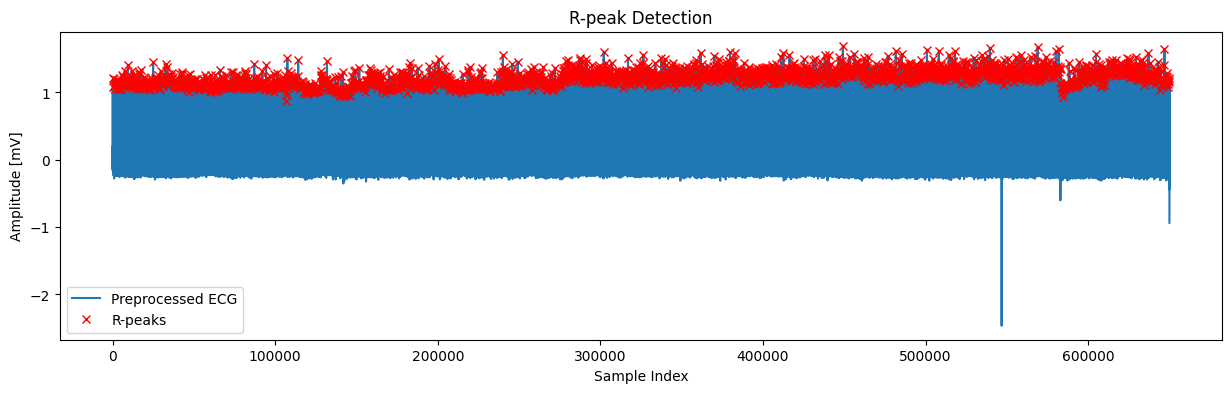

In [4]:
plt.figure(figsize=(15,4))
plt.plot(signal_smoothed, label='Preprocessed ECG')
plt.plot(peaks, signal_smoothed[peaks], 'rx', label='R-peaks')
plt.title('R-peak Detection')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude [mV]')
plt.legend()
plt.show()

###  3. Calculate RR intervals (in seconds)


In [5]:
rr_intervals = np.diff(peaks) / fs


### 4. Plot RR intervals


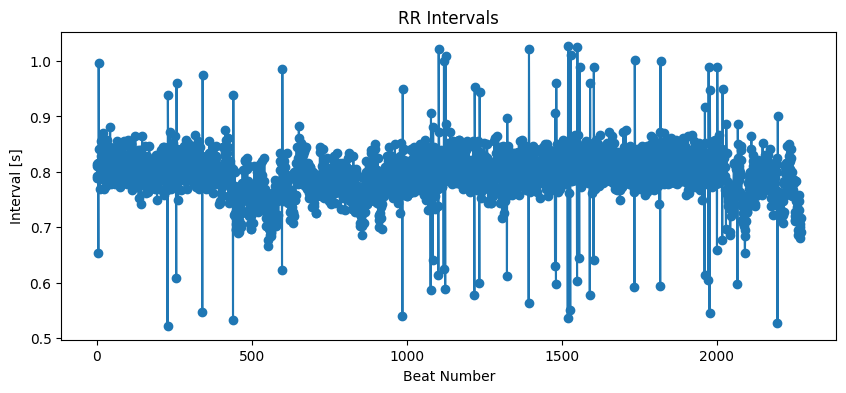

In [6]:
plt.figure(figsize=(10,4))
plt.plot(rr_intervals, marker='o')
plt.title('RR Intervals')
plt.xlabel('Beat Number')
plt.ylabel('Interval [s]')
plt.show()

### 5. Histogram of RR intervals


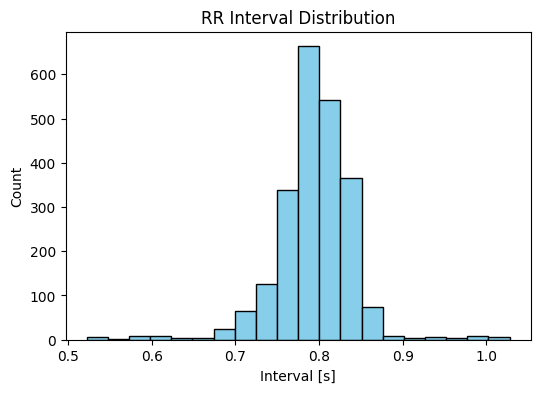

In [7]:
plt.figure(figsize=(6,4))
plt.hist(rr_intervals, bins=20, color='skyblue', edgecolor='black')
plt.title('RR Interval Distribution')
plt.xlabel('Interval [s]')
plt.ylabel('Count')
plt.show()


### 6. Compute average heart rate


In [8]:
mean_rr = np.mean(rr_intervals)
heart_rate = 60 / mean_rr
print(f"Average Heart Rate: {heart_rate:.2f} bpm")

Average Heart Rate: 75.51 bpm



### 7. Observations 
 - If RR intervals are very long (>1s), bradycardia may be present.
 - If RR intervals are very short (<0.6s), tachycardia may be present.
 - Large variation in RR intervals may indicate arrhythmia or irregular rhythm.

In [12]:
np.save('../data/rr_intervals.npy', rr_intervals)